<a href="https://colab.research.google.com/github/amfakh/FGA-Project/blob/master/Fashion%20MNIST%20with%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muhammad Ammar Fakhri

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/FGA

/content/drive/My Drive/Colab Notebooks/FGA


In [ ]:
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2019-11-17 15:05:30--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.126
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.126|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  14.5MB/s    in 1.7s    

2019-11-17 15:05:32 (14.5 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-11-17 15:05:39--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.ama

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data/fashion')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
type(fashion_mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [ ]:
fashion_mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7eff516b4cc0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7eff5c2c34e0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7eff5c2c3400>)

In [ ]:
x_train, y_train = fashion_mnist.train.images, fashion_mnist.train.labels
x_val, y_val = fashion_mnist.validation.images, fashion_mnist.validation.labels
x_test, y_test = fashion_mnist.test.images, fashion_mnist.test.labels

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(55000,)
(5000,)
(10000,)


In [ ]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_val = x_val.reshape(x_val.shape[0],*image_shape)

In [ ]:
class_names = ['T-Shirt', 'Celana', 'Hoodie', 'Kemeja', 'Jaket', 'Sandal', 'Kaos', 'Sneaker', 'Tas', 'Sepatu']

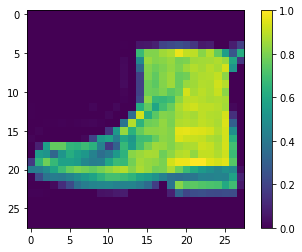

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[3].reshape((28,28)))
plt.colorbar()
plt.grid(False)

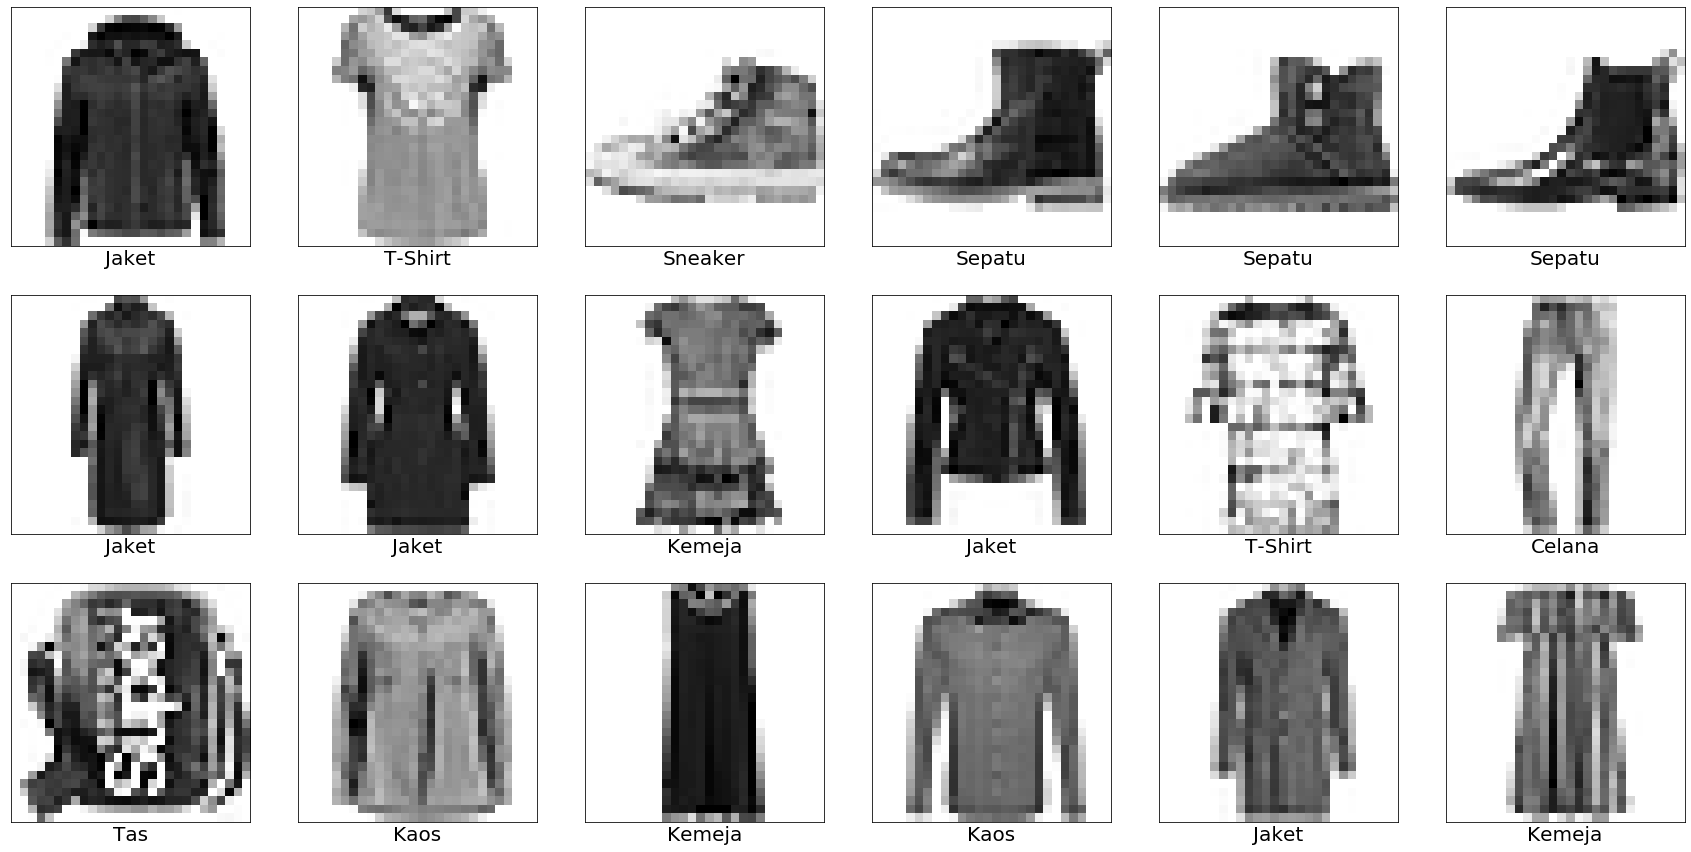

In [ ]:
plt.figure(figsize=(30,15))
for i in range(18):
  plt.subplot(3,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]], fontsize=20)

In [ ]:
import tensorflow as tf

import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
def make_model():
  Source = Input(shape=image_shape)
  Conv = Conv2D(32, kernel_size=3,
                  activation='relu',
                  input_shape=image_shape)(Source)
  Pool = MaxPooling2D(pool_size=2)(Conv)
  Drop = Dropout(0.25)(Pool)
  Conv = Conv2D(64, kernel_size=3,
                  activation='relu')(Drop)
  Pool = MaxPooling2D(pool_size=2)(Conv)
  Drop = Dropout(0.25)(Pool)
  Conv = Conv2D(128, kernel_size=3,
                  activation='relu')(Drop)
  Drop = Dropout(0.4)(Conv)
  Flat = Flatten()(Drop)
  D = Dense(128, activation='relu')(Flat)
  Drop = Dropout(0.3)(D)
  Predict = Dense(10, activation='softmax')(Drop)

  model = tf.keras.Model(inputs=[Source], 
                         outputs=[Predict])

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
  return model

In [ ]:
tf.keras.backend.clear_session()
training_model = make_model()
training_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
__________

In [ ]:
import os

TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    training_model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

tpu_model.summary()

INFO:tensorflow:Querying Tensorflow master (grpc://10.40.198.186:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 13597476967855149125)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 2812065986313222003)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 9414876726337332302)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 310774477996543184)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 8875233557448664083)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/

In [ ]:
import time
from keras.callbacks import EarlyStopping

start_time = time.time()

es = EarlyStopping(monitor='val_loss', mode='min', 
                   verbose=1, patience=7)


history = tpu_model.fit(x_train, y_train, 
                        batch_size=512, epochs=500, 
                        validation_data=(x_val, y_val),
                        callbacks=[es])

print("--- %s seconds ---" % (time.time() - start_time))

Train on 55000 samples, validate on 5000 samples
Epoch 1/500
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(64,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(64, 28, 28, 1), dtype=tf.float32, name='input_1_10'), TensorSpec(shape=(64, 1), dtype=tf.int32, name='dense_1_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning Adam {'lr': 0.0010000000474974513, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'amsgrad': False}
INFO:tensorflow:Remapping placeholder for input_1
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7f7962e16080> []
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 3.6348114013671875 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr: 0.0010000000474974513 {0.001}
INFO:tensorflow:CPU -> TPU be

In [ ]:
loss, accuracy = tpu_model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = tpu_model.evaluate(x_val, y_val, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(4,), dtype=tf.int32, name='core_id_10'), TensorSpec(shape=(4, 28, 28, 1), dtype=tf.float32, name='input_1_10'), TensorSpec(shape=(4, 1), dtype=tf.int32, name='dense_1_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for input_1
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7f795fd19518> []
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 1.4441826343536377 secs
54816/55000 [============================>.] - ETA: 0s - loss: 0.1620 - acc: 0.9381INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(3,), dtype=tf.int32, name='core_id_10'), TensorSpec(shape=(3, 28, 28, 1), dtype=tf.float32, name='input_1_10'), TensorSpec(shape=(3, 1), dtype=tf.int32, name='dense_1_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tenso

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

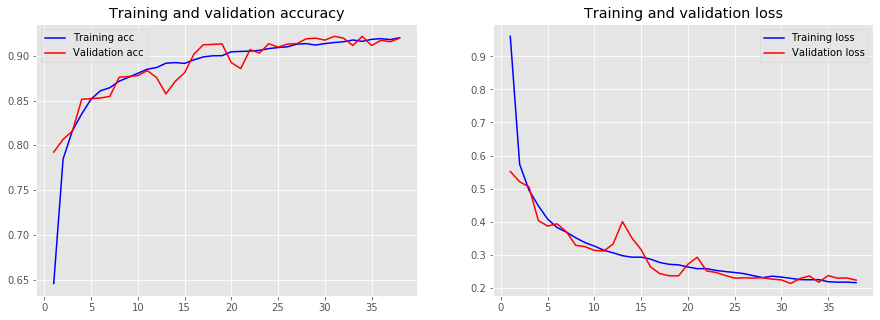

In [ ]:
plot_history(history)

In [ ]:
predictions = tpu_model.predict(x_test, batch_size=1000, verbose = 1)
y_pred = (predictions>0.5)

INFO:tensorflow:New input shapes; (re-)compiling: mode=infer (# of cores 8), [TensorSpec(shape=(125, 28, 28, 1), dtype=tf.float32, name='input_1_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning Adam {'lr': 0.0010000000474974513, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'amsgrad': False}
INFO:tensorflow:Remapping placeholder for input_1
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 2.999666213989258 secs
10000/10000 [==============================] - 5s 453us/sample


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape((28,28)), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


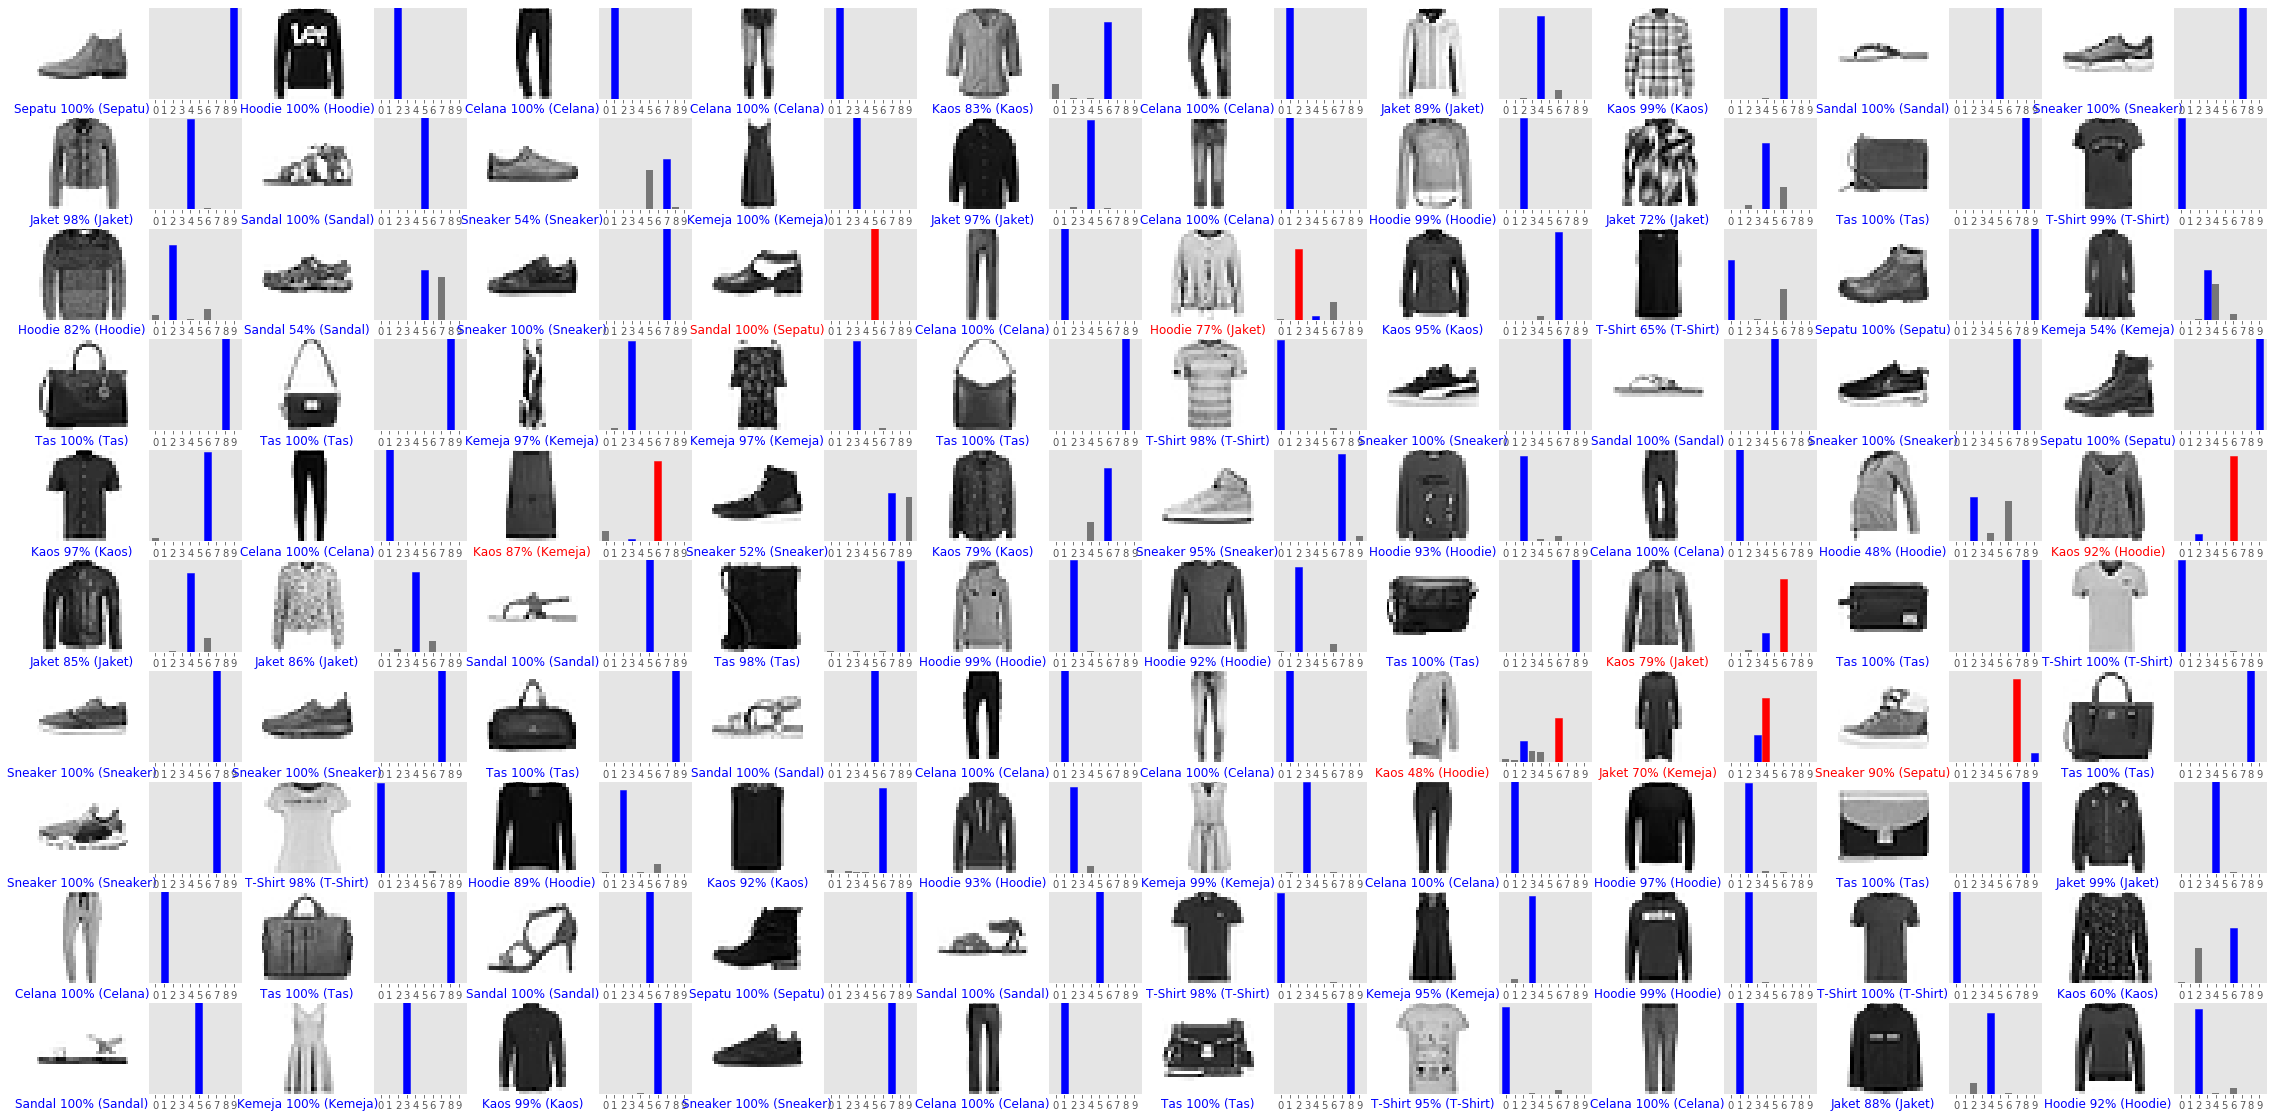

In [ ]:
import numpy as np

num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
 plt.subplot(num_rows, 2*num_cols, 2*i+1)
 plot_image(i, predictions[i], y_test, x_test)
 plt.subplot(num_rows, 2*num_cols, 2*i+2)
 plot_value_array(i, predictions[i], y_test)